# Alternative projection multi

In [1]:
# Getting all the required library
# using JuMP
# using GLPK

using Plots
using LinearAlgebra
using Statistics

In [2]:
# Create the vander function for creating a form of representing the vectors and calculations
vander(t,n) = hcat([t.^i for i = 0:n-1]...)

vander (generic function with 1 method)

In [37]:
# this function when there are 2 para to the deg n
function combine2Para(x,y,n)
    result = undef
    for i in 0:n
        for j in 0:i
            if result == undef
                result = (x^i)*(y^j)
            else
                check = (x^i)*(y^j)
                result = hcat(result, check)
            end
        end
    end
    return result
end

combine2Para (generic function with 1 method)

In [54]:
combine2Para(2,2,6)

1×28 Array{Int64,2}:
 1  2  4  4  8  16  8  16  32  64  16  …  64  128  256  512  1024  2048  4096

In [69]:
# Setting the parameters
T_x=0:0.1:5 # Interpolation points
T_y=0:0.1:5 # Interpolation points

(n, m) = (3, 3) # The power of the 2 poly in the rational functions

(3, 3)

In [4]:
# the function with 2 inputs
# N = 10
# c = rand(N)
f(x,y) = y*x*3 - x^2 - y^2 + 3

f (generic function with 1 method)

In [6]:
function calThePoints(rangeOfCheck_x, rangeOfCheck_y, func)
    szOfArr = size(rangeOfCheck_x)[1] * size(rangeOfCheck_y)[1]
    x_coor = Array{Float64}(undef,  szOfArr)
    y_coor = Array{Float64}(undef, szOfArr)
    z_coor = Array{Float64}(undef, szOfArr)

    count = 1

    for a in rangeOfCheck_x
        for b in rangeOfCheck_y
            x_coor[count] = a
            y_coor[count] = b
            z_coor[count] = func(a,b)
            count = count + 1
        end
    end
    return x_coor, y_coor, z_coor
end

calThePoints (generic function with 1 method)

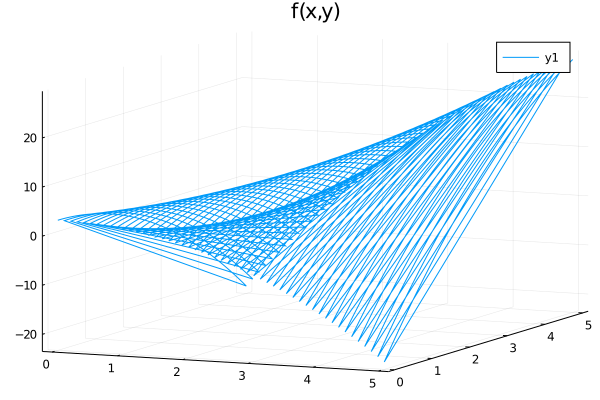

In [7]:
# plot the f to see
x,y,z = calThePoints(T_x, T_y, f)
plot3d(x, y, z,  markersize = 1, title="f(x,y)")

In [72]:
# we are creating hyperplanes by thinking f(x) = p(x)/q(x)
# or converting to <A, xn> - f(x)<B, xm> = 0 with A, B is correspondingly coe of p(x) and q(x) and are the keys
# xn and xm are the vectors which will represent the fucntions
# for easy calculation combining A and B into a big vector so it would be: <A to B, xn to -f(x)xm> = 0
# this is a hyperplan formula with d = 0
# therefore, xn to -f(x)xm is the vector of the hyperplane in R n+m+2 space

# function to calculate the distince between a point and the hyperplane with the sign
function calculateDisAndPoint(big_vect, the_point)
#     calculate distance by |vect.start_point + d|/||vect|| , d is 0 in this case
    a = sum(hcat([the_point[i]*big_vect[i] for i in 1:size(big_vect)[2]]...))
    b = sum(hcat([big_vect[i]*big_vect[i] for i in 1:size(big_vect)[2]]...))
    c = sqrt(b)
    dis = a/c
#     calculate lambda in x - x0 = lambda.vect to calculate the projectpoint
    lambd = a/b
    x0 = the_point - (lambd * big_vect)
    return dis, x0
end

calculateDisAndPoint (generic function with 1 method)

In [70]:
# Calculate the big vector for each hyper plane
num_hy = size(T_x)[1] * size(T_y)[1]
big_vect_Arr = Array{Array{Float64}}(undef, 1, num_hy)

count = 1
for a in T_x
    for b in T_y
        xn = combine2Para(a,b,n)
        xm = combine2Para(a,b,m)
#         println(xm)
        big_vect_Arr[count] = hcat(xn, -f(a,b)*xm)
        count = count + 1
    end
end

In [71]:
big_vect_Arr[1]

1×20 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0

In [74]:
# iterate after a certain times and store the value in a array of the size of number of hyperplanes
pointA = Array{Array{Float64}}(undef, 1, num_hy)
hy_space_sz = sum(i for i in 1:(n+1)) + sum(j for j in 1:(m+1))
error_rate = 0.001

s_p = vander(1, hy_space_sz)
need_to_cal = true
count = 0

@time while true
    for i in 1:num_hy
        result = calculateDisAndPoint(big_vect_Arr[i],s_p)
        if isassigned(pointA, i)
            if need_to_cal
                a = pointA[i] - result[2]
                if sqrt(dot(a, a)) > error_rate
                    need_to_cal = false
                end
            end
        else
            need_to_cal = false
        end
        pointA[i] = result[2]
        s_p = result[2]
    end
    count += 1
    if need_to_cal
        break
    else
        need_to_cal = true
    end
end

println("the number of iteration: ", count)

  4.639245 seconds (12.71 M allocations: 513.360 MiB, 7.90% gc time)
the number of iteration: 80


In [75]:
# calculate the mid point
mid_p = sum(pointA)/num_hy

1×20 Array{Float64,2}:
 0.00752004  0.252218  -0.234765  0.413561  …  -0.00258062  -6.08906e-5

In [79]:
function g(x,y)
    result1 = 0
    result2 = 0
    count = 1
    for i in 0:n
        for j in 0:i
            check = (x^i)*(y^j)
            result1 = result1 + mid_p[count]*check
            count = count + 1
        end
    end
    for i in 0:m
        for j in 0:i
            check = (x^i)*(y^j)
            result2 = result2 + mid_p[count]*check
            count = count + 1
        end
    end
    return result1/result2
end

g (generic function with 1 method)

In [86]:
# we now have the final results
g(1,1)

4.1283148699958625

In [85]:
f(1,1)

4

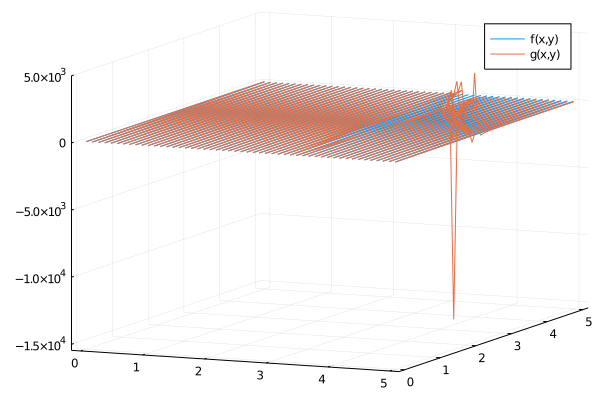

In [95]:
# plot the f and g to see
x,y,z = calThePoints(T_x, T_y, f)
x2,y2,z2 = calThePoints(T_x, T_y, g)
plot3d(x, y, z, markersize = 1, label="f(x,y)")
plot3d!(x2, y2, z2,  markersize = 1, label="g(x,y)")